In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [12]:
def width2var(w):
    var = (w/2)**2
    return var

In [13]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (8))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 450, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (40))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [14]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(data.shape)
print(data)
print(locs)
print(rents)

(78, 3)
[[131.88385549 474.00727904  23.69132722]
 [140.09214001 475.45226046  28.48547527]
 [ 61.25077889 545.49172856  26.90252922]
 [134.64641877 542.77257805  23.76610845]
 [107.41760295 446.66103417  26.48684616]
 [146.8495741  458.31416661  26.70385718]
 [103.16321362 423.32162436  26.27703414]
 [122.61796191 441.00805274  24.23507511]
 [516.77187678 486.38645264  34.73879607]
 [565.96818318 491.30839588  33.4776206 ]
 [479.94929104 426.67304278  33.71504362]
 [524.75482486 462.96523153  34.75340638]
 [521.71992207 449.09520276  36.77949776]
 [485.30966126 379.71373345  36.30464167]
 [515.11021869 459.48612112  33.37830652]
 [498.66906091 530.84600078  36.72236513]
 [481.45369705 455.48041634  36.32114211]
 [434.80900073 384.21649177  32.60182014]
 [458.13775349 357.40550033  34.74201318]
 [439.70374473 418.36530349  37.17488062]
 [485.47738897 421.62684659  35.14981326]
 [536.95450717 374.28332066  35.70850803]
 [504.53485663 485.40851639  32.80715571]
 [503.63231385 464.1724073

(874, 620, 3)


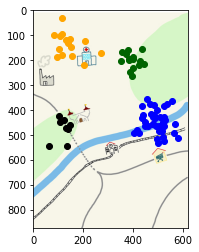

In [15]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

[Text(0.5, 0.8333333333333334, 'X[1] <= 309.483\nsquared_error = 71.821\nsamples = 78\nvalue = 27.566'),
 Text(0.25, 0.5, 'X[0] <= 312.8\nsquared_error = 22.214\nsamples = 30\nvalue = 18.278'),
 Text(0.125, 0.16666666666666666, 'squared_error = 4.332\nsamples = 15\nvalue = 13.963'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2.856\nsamples = 15\nvalue = 22.593'),
 Text(0.75, 0.5, 'X[0] <= 276.509\nsquared_error = 15.208\nsamples = 48\nvalue = 33.371'),
 Text(0.625, 0.16666666666666666, 'squared_error = 2.622\nsamples = 8\nvalue = 25.819'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.037\nsamples = 40\nvalue = 34.881')]

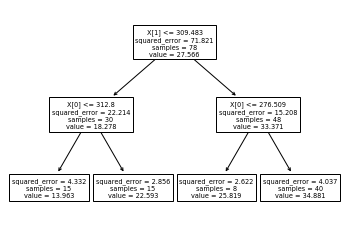

In [17]:
tree.plot_tree(model)

In [18]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data.tolist()))
print(img.shape)
mietdaten = np.copy(data)
mietdaten[:,0] = data[:,0]/img.shape[1]*100
mietdaten[:,1] = data[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(874, 620, 3)


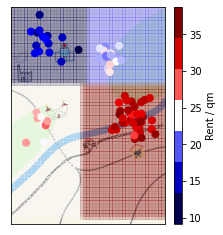

In [19]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None